<a href="https://colab.research.google.com/github/mqquiroz/easywave/blob/main/Illapel_2015_Shiva_EW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install basemap
!wget https://git.gfz-potsdam.de/id2/geoperil/easyWave/-/raw/master/bin/r34/easywave_r34_src.tar.gz?inline=false
!tar -xzf easywave_r34_src.tar.gz?inline=false
!rm easywave_r34_src.tar.gz\?inline\=false
%cd easywave/
!./configure
!make
!make install
%cd /usr/local/easywave/bin/
!chmod +x easywave
import os
cwd = os.getcwd()
os.environ['PATH'] += ":"+cwd
%cd /content/
!rm -r easywave

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 864 kB 14.1 MB/s 
     |████████████████████████████████| 30.5 MB 1.2 MB/s 
     |████████████████████████████████| 6.3 MB 49.6 MB/s 
     |████████████████████████████████| 46 kB 4.1 MB/s 


--2022-11-23 17:24:06--  https://git.gfz-potsdam.de/id2/geoperil/easyWave/-/raw/master/bin/r34/easywave_r34_src.tar.gz?inline=false
Resolving git.gfz-potsdam.de (git.gfz-potsdam.de)... 139.17.228.166
Connecting to git.gfz-potsdam.de (git.gfz-potsdam.de)|139.17.228.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3995705 (3.8M) [application/octet-stream]
Saving to: ‘easywave_r34_src.tar.gz?inline=false’

easywave_r34_src.ta 100%[===================>]   3.81M  --.-KB/s    in 0.1s    

2022-11-23 17:24:06 (25.8 MB/s) - ‘easywave_r34_src.tar.gz?inline=false’ saved [3995705/3995705]

/content/easywave
checking for a BSD-compatible install... /usr/bin/install -c
checking whether build environment is sane... yes
checking for a thread-safe mkdir -p... /bin/mkdir -p
checking for gawk... no
checking for mawk... mawk
checking whether make sets $(MAKE)... yes
checking whether make supports nested variables... yes
checking for g++... g++
checking whether the C++ compile

In [2]:
!wget https://raw.githubusercontent.com/mqquiroz/easywave/main/Grids/grid30s.grd
!wget https://raw.githubusercontent.com/mqquiroz/easywave/main/Illapel2015/shiva_ew.flt
!wget https://raw.githubusercontent.com/mqquiroz/easywave/main/Illapel2015/POI_Illapel2015.txt

!mkdir simulacion
%cd simulacion
#!easywave -grid /content/examples/e2Asean.grd -source /content/examples/BengkuluSept2007.flt -time 120
!easywave -grid /content/grid30s.grd -source /content/shiva_ew.flt -poi /content/POI_Illapel2015.txt -time 120 
#-poi /content/POIs_Sumatra2004.txt
!wget https://raw.githubusercontent.com/mqquiroz/easywave/main/functions_easywave.py

--2022-11-23 17:24:16--  https://raw.githubusercontent.com/mqquiroz/easywave/main/Grids/grid30s.grd
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21980194 (21M) [text/plain]
Saving to: ‘grid30s.grd’

grid30s.grd         100%[===================>]  20.96M  --.-KB/s    in 0.1s    

2022-11-23 17:24:18 (157 MB/s) - ‘grid30s.grd’ saved [21980194/21980194]

--2022-11-23 17:24:18--  https://raw.githubusercontent.com/mqquiroz/easywave/main/Illapel2015/shiva_ew.flt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 47154 (46K) [text/plain]

In [3]:
from functions_easywave import ew2py
from functions_easywave import load_surfer
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import scipy.interpolate
import netCDF4 as nc4
from IPython.display import HTML
from matplotlib import animation

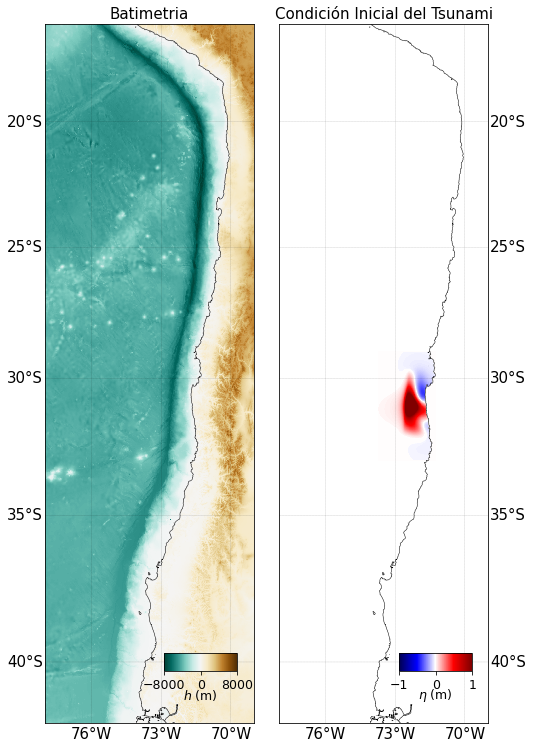

In [4]:
#Batimetria
lon_x, lat_y, grd, (ny,nx) =load_surfer('/content/grid30s.grd',fmt='ascii')
lon_x=lon_x.reshape(ny,nx)
lat_y=lat_y.reshape(ny,nx)
grid=grd.reshape(ny,nx)

alto = 12.5
ancho = 7.5

fig = plt.figure(figsize=(ancho,alto))

ax = fig.add_subplot(121)
m = Basemap(projection='merc',llcrnrlat=np.min(lat_y),urcrnrlat=np.max(lat_y),llcrnrlon=np.min(lon_x),urcrnrlon=np.max(lon_x),lat_ts=-30,resolution='c')
lon_xm,lat_ym = m(lon_x,lat_y)

my_cmap = plt.cm.BrBG_r
cs = m.pcolormesh(lon_xm,lat_ym,grid,cmap = my_cmap,vmin=-8000,vmax=8000)
m.contour(lon_xm,lat_ym,grid,levels=[0],colors='k',linewidths=0.5)
m.drawparallels(np.arange(-40,-16+5,5),labels=[1,0,0,0],linewidth=0.15, fontsize=15)
m.drawmeridians(np.arange(-79,-69+3,3),labels=[0,0,0,1],linewidth=0.15, fontsize=15,yoffset=10000)
cbaxes = ax.inset_axes([0.57, 0.075, 0.35, 0.025])# ,width="35%", height="2.0%",borderpad=3.5,) 
cbar = fig.colorbar(cs, cax=cbaxes, ticks=[-8000,0,8000], orientation='horizontal')
cbar.set_label(r'$h$ (m)',fontsize=12.5, ha='center', va='center')
cbar.ax.tick_params(labelsize=12.5)
ax.set_title('Batimetria',fontsize=15)



#Condición Inicial
fileName = 'eWave.2D.00000.ssh'.format(0)# {0:05d}'eWave.2D.sshmax'
lon, lat, h0 = ew2py(fileName)
lon, lat = np.meshgrid(lon, lat)


h0_interp = scipy.interpolate.griddata((lon.flatten(),lat.flatten()),h0.flatten() , (lon_x,lat_y),method='linear')

m = Basemap(projection='merc',llcrnrlat=np.min(lat_y),urcrnrlat=np.max(lat_y),llcrnrlon=np.min(lon_x),urcrnrlon=np.max(lon_x),lat_ts=-30,resolution='c')

ax = fig.add_subplot(122)
cmap2=plt.cm.seismic

m.contour(lon_xm,lat_ym,grid,0,colors='k',linewidths=0.5)
cond_ini = m.pcolormesh(lon_xm,lat_ym,h0_interp,cmap=cmap2,vmin=-1.0,vmax=1.0)
m.drawparallels(np.arange(-40,-20+5,5),labels=[0,1,0,0],linewidth=0.15, fontsize=15)
m.drawmeridians(np.arange(-79,-69+3,3),labels=[0,0,0,1],linewidth=0.15, fontsize=15,yoffset=10000)

cbaxes = ax.inset_axes([0.575, 0.075, 0.35, 0.025])#(ax, width="30%", height="2.0%",borderpad=2.5, loc=4) 
cbar = fig.colorbar(cond_ini, cax=cbaxes, ticks=[-1,0,1], orientation='horizontal')
cbar.set_label(r'$\eta$ (m)',fontsize=12.5, ha='center', va='center')
cbar.ax.tick_params(labelsize=12.5)
ax.set_title('Condición Inicial del Tsunami',fontsize=15)
fig.tight_layout()
plt.show()

In [5]:
def file_netcdf(name,grid,descripcion,dt,ttotal): # name 'sample.nc', grid:'/content/examples/e2Asean.grd', descripcion: "Simulacion MQ1"
  import numpy as np
  import netCDF4 as nc4
  from scipy.interpolate import griddata
  from scipy.interpolate import RegularGridInterpolator
  lon_x, lat_y, grd, (ny,nx) =load_surfer(grid)
  lon_x=lon_x.reshape(ny,nx)
  lat_y=lat_y.reshape(ny,nx)
  grid=grd.reshape(ny,nx)
  t = np.arange(0,ttotal+dt,dt)
  pasos = int(ttotal/dt)+1

  f = nc4.Dataset(name,'w', format='NETCDF4') #'w' stands for write
  f.createDimension('lon',nx)
  f.createDimension('lat',ny)
  f.createDimension('time',pasos)

  longitude = f.createVariable('Longitude', 'f4', 'lon')
  latitude = f.createVariable('Latitude', 'f4', 'lat')  
  time = f.createVariable('Time', 'i4', 'time')
  ssh = f.createVariable('SSH', 'f4', ('time', 'lat' , 'lon'))

  longitude[:] = lon_x[0,:]
  latitude[:]  = lat_y[:,0]
  time[:] = t
  lon_lat = [latitude[:],longitude[:]]
  print([longitude[:], latitude[:]])

  #Add global attributes
  f.description = descripcion
  #Add local attributes to variable instances
  longitude.units = 'degrees'
  latitude.units = 'degrees'
  time.units = 'minutes'
  ssh.units = 'meters'

  for i in range(0,pasos):
    fileName= 'eWave.2D.{0:05d}.ssh'.format(i*60*dt)
    lon, lat, h0 = ew2py(fileName)
    lon, lat = np.meshgrid(lon, lat)
    h0_interp = scipy.interpolate.griddata((lon.flatten(),lat.flatten()),h0.flatten() , (lon_x,lat_y),method='linear', fill_value=0.0)
    #interp = RegularGridInterpolator((lat, lon), h0,bounds_error=False, fill_value=None)
    #interp = RegularGridInterpolator((lon, lat), h0,bounds_error=False, fill_value=None)
    #data = interp(lon_lat)
    ssh[i,:,:] = h0_interp
  
  f.close
  return f

In [6]:
data = file_netcdf('Sim_Tsu2015_Shiva.nc','/content/grid30s.grd','Simulacion MQ',5,120)

[masked_array(data=[-77.99792 , -77.989586, -77.98125 , ..., -69.02292 ,
                   -69.01458 , -69.00625 ],
             mask=False,
       fill_value=1e+20,
            dtype=float32), masked_array(data=[-41.997917, -41.989582, -41.98125 , ..., -16.022917,
                   -16.014584, -16.00625 ],
             mask=False,
       fill_value=1e+20,
            dtype=float32)]


In [7]:
#Abrir NetCDF4
sim = nc4.Dataset('Sim_Tsu2015_Shiva.nc')
#sim.variables
eta0 = sim['SSH'][0,::]
lon_x = sim['Longitude'][:]
lat_y = sim['Latitude'][:]

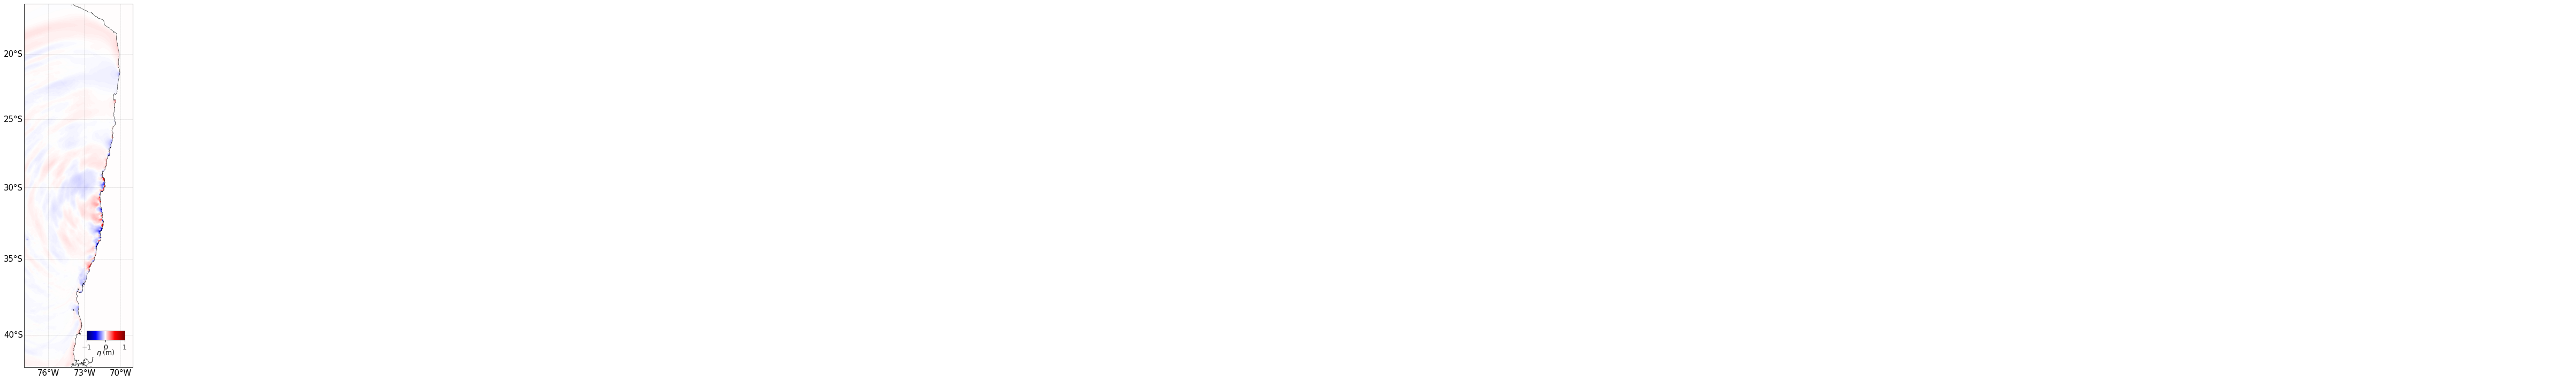

In [8]:
#Creamos el grafico
alto  = 12.5
ancho = 7.5

fig, ax = plt.subplots(figsize=(ancho,alto))


m = Basemap(projection='merc',llcrnrlat=np.min(lat_y),urcrnrlat=np.max(lat_y),llcrnrlon=np.min(lon_x),urcrnrlon=np.max(lon_x),lat_ts=-30,resolution='c')
X, Y = np.meshgrid(lon_x,lat_y)
lon_xm,lat_ym = m(X,Y)

cmap2=plt.cm.seismic
m.contour(lon_xm,lat_ym,grid,0,colors='k',linewidths=0.5)
m.drawparallels(np.arange(-40,-20+5,5),labels=[1,0,0,0],linewidth=0.15, fontsize=15)
m.drawmeridians(np.arange(-79,-69+3,3),labels=[0,0,0,1],linewidth=0.15, fontsize=15,yoffset=15000)


quad = m.pcolormesh(lon_xm,lat_ym,np.zeros(np.shape(X)),shading='gouraud',cmap=plt.cm.seismic, vmin=-1, vmax = 1)
time_text = ax.annotate('Jul-24-2012', xy=m(130, -25),size=15,bbox=dict(boxstyle="round", fc="0.9", ec="gray",alpha=0.9),horizontalalignment='center', verticalalignment='top')#, xycoords='axes fraction')

cbaxes = ax.inset_axes([0.575, 0.075, 0.35, 0.025])#(ax, width="30%", height="2.0%",borderpad=2.5, loc=4) 
cbar = fig.colorbar(quad, cax=cbaxes, ticks=[-1,0,1], orientation='horizontal')
cbar.set_label(r'$\eta$ (m)',fontsize=12.5, ha='center', va='center')
cbar.ax.tick_params(labelsize=12.5)
#ax.set_title('Tsunami de Illapel 2015',fontsize=15)
dt = 5

def animate(t):
  eta = sim['SSH'][t,::]
  time_text.set_text('Tiempo = %1.0f  min' % (t*dt,))
  quad.set_array(eta.ravel())
  return quad, time_text

#cond_ini = m.pcolormesh(lon_xm,lat_ym,h0_interp,cmap=cmap2,vmin=-1.0,vmax=1.0)

anim = animation.FuncAnimation(fig, animate, frames= int(120/5)+1, interval=200, blit=True)
anim.save('Tsunami_Illapel_2014_Shiva.mp4', dpi=300)

HTML(anim.to_jshtml())

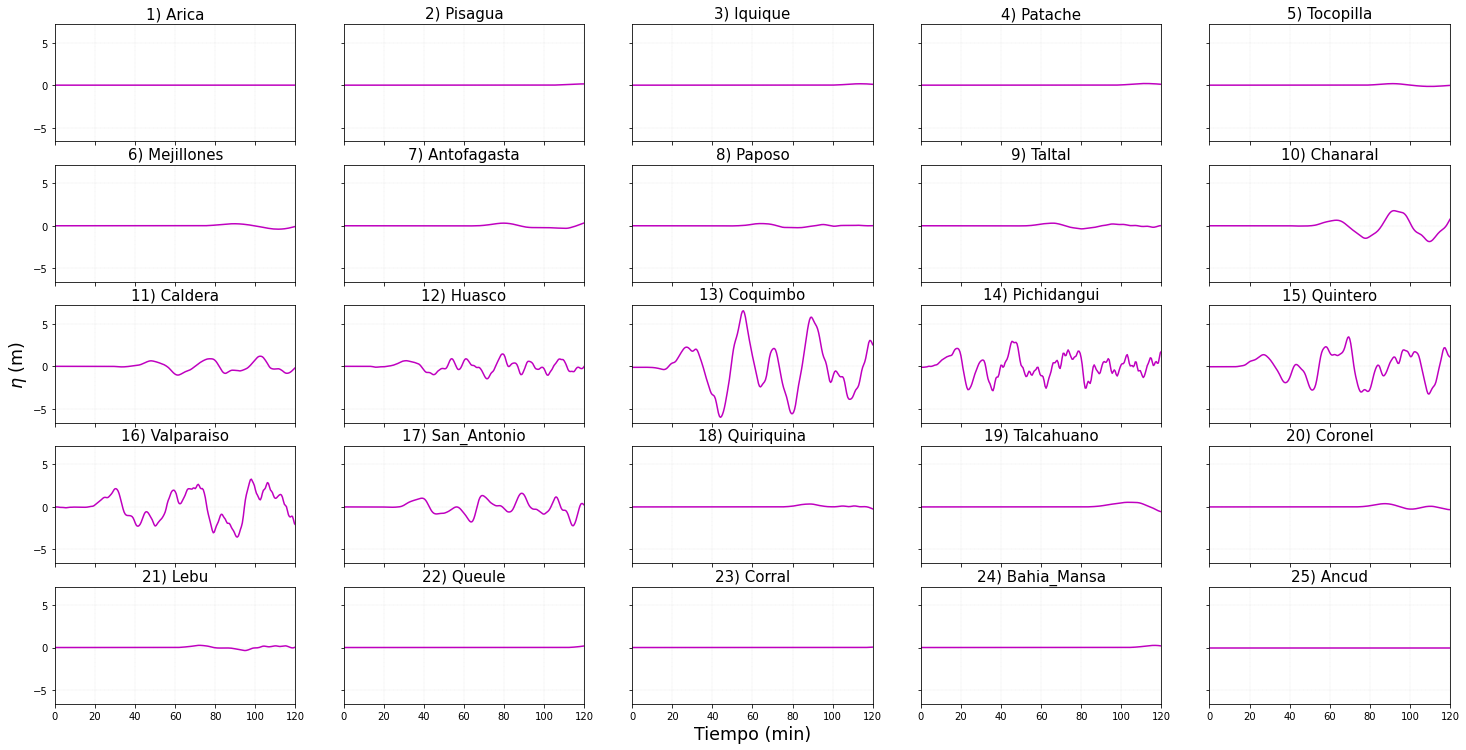

In [9]:
ts_data = np.loadtxt('eWave.poi.ssh',skiprows=1)
nt, n_ts = np.shape(ts_data)
tiempo = ts_data[:,0] #en minutos

with open('eWave.poi.ssh') as f:
  first_line = f.readline().strip('\n')

first_line = first_line.split(' ')
first_line = first_line[::3]
estaciones = first_line[1:]


#Creamos el grafico
alto  = 12.5
ancho = 25

fig, ax = plt.subplots(5,5,figsize=(ancho,alto),sharey=True,sharex=True)
ax = ax.ravel()

for i in range(n_ts-1):
  eta = ts_data[:,i+1]
  ax[i].plot(tiempo,eta,'-m')
  ax[i].set_title(str(i+1)+') '+estaciones[i],fontsize=15)
  ax[i].set_xlim(min(tiempo),max(tiempo))
  ax[i].grid(color='lightgray', linestyle='--', linewidth=0.25)
  if i == 10:
    ax[i].set_ylabel('$\eta$ (m)',fontsize=17.5)
  elif i == 22:
    ax[i].set_xlabel('Tiempo (min)',fontsize=17.5)

fig.savefig('M_simulados.png',dpi=300)
plt.show() 